### Student Information
Name: 陳姿穎

Student ID: 109011214

GitHub ID: s109011214

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

In [1]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

In [2]:
##Exercise 1 
for i in twenty_train.data[0:3]:
    print(i)

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gurus' can help me solve.

	Background of the problem:
	I have a rectangular mesh in the uv

In [3]:
### Exercise 2 
import pandas as pd
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

X[X['category_name'] == 'sci.med']

text  category  \
7     From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8     From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9     From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   
16    From: texx@ossi.com (Robert "Texx" Woodworth) ...         2   
28    From: rind@enterprise.bih.harvard.edu (David R...         2   
...                                                 ...       ...   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   

     category_name  
7          sci.med  
8          sci.med  
9          sci.med  
16         sci.med  
28         sci.med  
...            ...  
2252       sci.med  
2253       sci.med  
2254       sci.med  
2255       sci.med  
2256       sci.med  

[594 rows x 3 columns]

In [4]:
### Exercise 3

X[X['category_name']=='sci.med'].iloc[::10][0:5]

text  category category_name
7    From: aldridge@netcom.com (Jacquelin Aldridge)...         2       sci.med
49   From: jimj@contractor.EBay.Sun.COM (Jim Jones)...         2       sci.med
82   From: jason@ab20.larc.nasa.gov (Jason Austin) ...         2       sci.med
118  From: rogers@calamari.hi.com (Andrew Rogers) S...         2       sci.med
142  From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...         2       sci.med

In [5]:
### Exercise 4
X.isnull().apply(lambda x: dmh.check_missing_values(x),axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2252    (The amoung of missing records is: , 0)
2253    (The amoung of missing records is: , 0)
2254    (The amoung of missing records is: , 0)
2255    (The amoung of missing records is: , 0)
2256    (The amoung of missing records is: , 0)
Length: 2257, dtype: object

In [6]:
### Exercise 5
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df['missing_example'].isnull()

# A、B、E是真的存在缺失值，所以返回True
# C的 "NaN" 和 D 的 'None' 是字串，所以不算缺失值
# F是空字串，也是字串的一種，所以也不算缺失值

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [7]:
### Exercise 6

X_sample = X.sample(n=1000,random_state=42) #random state
display(X_sample[0:4])
display(X[0:4])

# 可以觀察到，原先的資料的 index是有照順序排的，但在隨機取樣後，就沒有照順序排列，所以 X_sample的前4筆資料不是照原始的順序

text  category  \
561   From: ray@engr.LaTech.edu (Bill Ray) Subject: ...         2   
440   From: jkellett@netcom.com (Joe Kellett) Subjec...         3   
1513  From: noring@netcom.com (Jon Noring) Subject: ...         2   
1360  From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...         3   

               category_name  
561                  sci.med  
440   soc.religion.christian  
1513                 sci.med  
1360  soc.religion.christian

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian

277
sci.med                   277
soc.religion.christian    270
comp.graphics             247
alt.atheism               206
Name: category_name, dtype: int64


<Axes: title={'center': 'Category distribution'}>

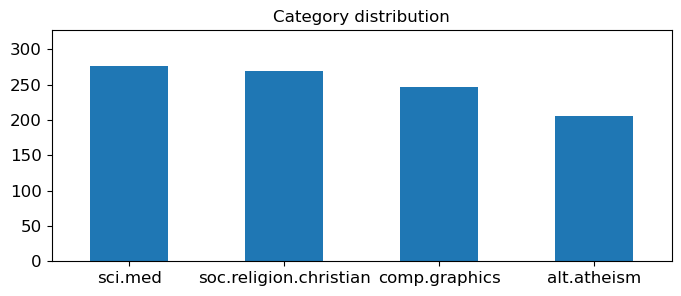

In [8]:
### Exercise 7

import matplotlib.pyplot as plt

print(max(X_sample.category_name.value_counts()))
upper_bound = max(X_sample.category_name.value_counts() + 50) #277 + 50
print(X_sample.category_name.value_counts())

X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

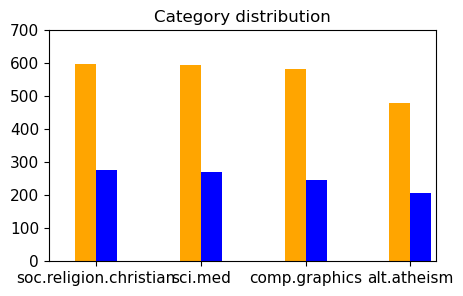

In [9]:
### Exercise 8
X_sample.category_name.value_counts().plot(kind='bar',
                                           title = 'Category distribution',
                                           ylim=[0, 700], 
                                           rot=0,
                                           fontsize=12,
                                           figsize = (5,3),
                                           position=0, 
                                           width=0.2,
                                           color='blue') 

X.category_name.value_counts().plot(kind='bar',
                                    title = 'Category distribution',
                                    ylim=[0, 700], 
                                    rot=0, 
                                    fontsize=11,
                                    figsize = (5,3),
                                    position=1, 
                                    width=0.2,
                                    color='orange')  

# 顯示圖表
plt.show()

In [10]:
### Exercise 9
import nltk
nltk.download('punkt')
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
analyze = count_vect.build_analyzer()
analyze(X.text[0])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jenny\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

In [12]:
### Exercise 10
ans_index = X_counts[4, 0:100].nonzero()[1]
vocabulary = count_vect.get_feature_names_out()
words = vocabulary[ans_index[1]]
print(words)

01


term_00  term_000  term_0000  term_0000001200  term_000005102000  \
doc_0           0         0          0                0                  0   
doc_1           0         0          0                0                  0   
doc_2           0         0          0                0                  0   
doc_3           0         0          0                0                  0   
doc_4           1         0          0                0                  0   
...           ...       ...        ...              ...                ...   
doc_2252        0         0          0                0                  0   
doc_2253        0         0          0                0                  0   
doc_2254        0         0          0                0                  0   
doc_2255        0         0          0                0                  0   
doc_2256        0         0          0                0                  0   

          term_0001  term_000100255pixel  term_00014  term_000406  term_0007  \
doc_0             0                    0           0            0          0   
doc_1             0                    0           0            0          0   
doc_2             0                    0           0            0          0   
doc_3             0                    0           0            0          0   
doc_4             0                    0           0            0          0   
...             ...                  ...         ...          ...        ...   
doc_2252          0                    0           1            0          0   
doc_2253          0                    0           0            0          0   
doc_2254          0                    0           0            0          0   
doc_2255          0                    0           0            0          0   
doc_2256          0                    0           0            0          0   

          ...  term_zvi  term_zvonko  term_zwart  term_zyeh  term_zyklon  \
doc_0     ...         0            0           0          0            0   
doc_1     ...         0            0           0          0            0   
doc_2     ...         0            0           0          0            0   
doc_3     ...         0            0           2          0            0   
doc_4     ...         0            0           0          0            0   
...       ...       ...          ...         ...        ...          ...   
doc_2252  ...         0            0           0          0            0   
doc_2253  ...         0            0           0          0            0   
doc_2254  ...         0            0           0          0            0   
doc_2255  ...         0            0           0          0            0   
doc_2256  ...         0            0           0          0            0   

          term_zyxel  term_zz  term_zzz  term_ªl  term_íålittin  
doc_0              0        0         0        0              0  
doc_1              0        0         0        0              0  
doc_2              0        0         0        0              0  
doc_3              0        0         0        0              0  
doc_4              0        0         0        0              0  
...              ...      ...       ...      ...            ...  
doc_2252           0        0         0        0              0  
doc_2253           0        0         0        0              0  
doc_2254           0        0         0        0              0  
doc_2255           0        0         0        0              0  
doc_2256           0        0         0        0              0  

[2257 rows x 35788 columns]

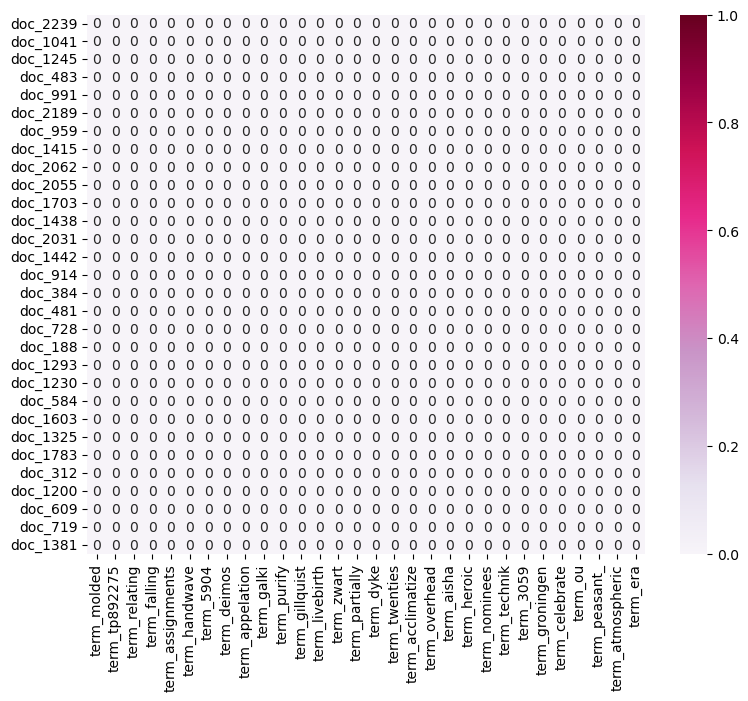

In [13]:
### Exercise 11
import seaborn as sns
import random 

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()]
plot_y = ["doc_"+ str(i) for i in list(X.index)]
plot_z = X_counts.toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)

sampled_indices_x = random.sample(range(len(plot_x)), 30)
sampled_indices_y = random.sample(range(len(plot_y)), 30)
sampled_plot_x = [plot_x[i] for i in sampled_indices_x]
sampled_plot_y = ["doc_"+str(i) for i in sampled_indices_y]
sampled_plot_z = [plot_z[i] for i in sampled_indices_y]
sampled_plot_z = [row[sampled_indices_x] for row in sampled_plot_z]

sampled_df = pd.DataFrame(sampled_plot_z, columns=sampled_plot_x, index=sampled_plot_y)

plt.subplots(figsize=(9, 7))
ax = sns.heatmap(sampled_df, cmap="PuRd", vmin=0, vmax=1, annot=True)

#為了能較有效率的讓圖片顯示出來，我隨機在35788個詞彙中，選30個出來，然後在2256個文件中，隨機取30個出來，並以此繪製成圖片

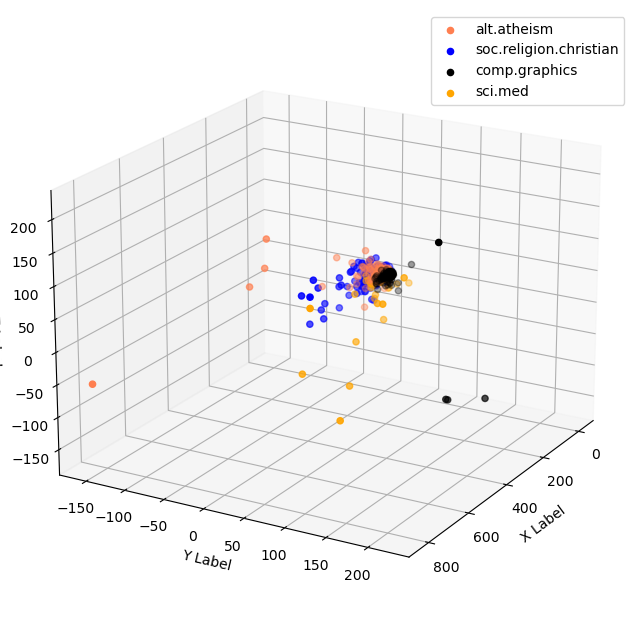

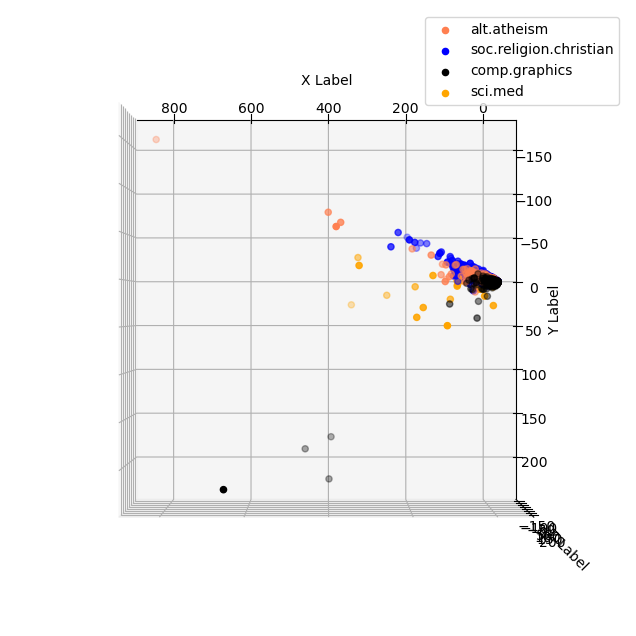

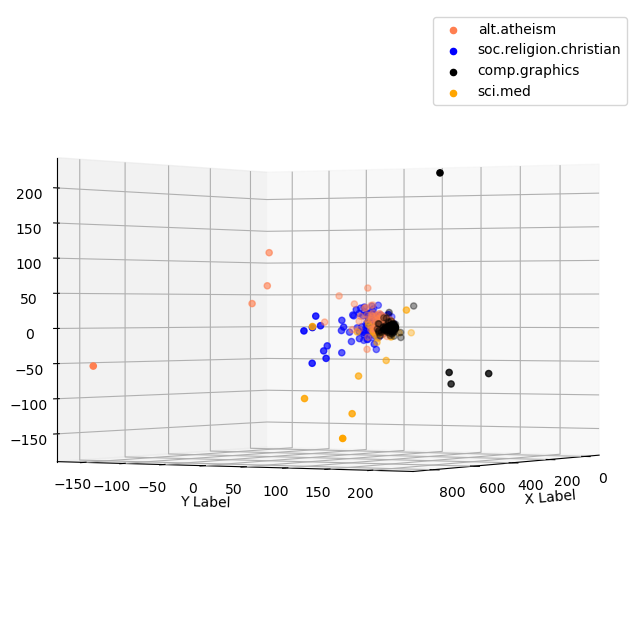

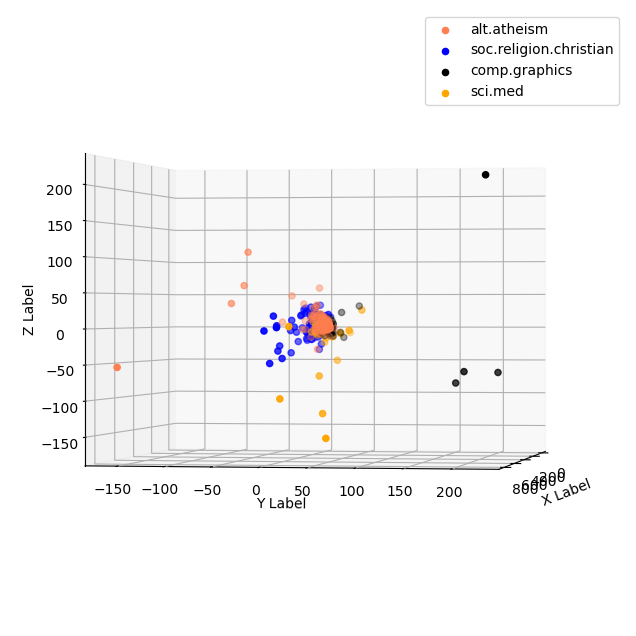

In [13]:
### Exercise 12
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_with_view(X_reduced, categories, elev, azim):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    col = ['coral', 'blue', 'black', 'orange']

    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2]

        ax.scatter(xs, ys, zs, c=c, label=category, marker='o')

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.legend()

    ax.view_init(elev=elev, azim=azim)
    plt.show()

X_reduced = PCA(n_components=3).fit_transform(X_counts.toarray())

plot_3d_with_view(X_reduced, categories, elev=20, azim=30)
plot_3d_with_view(X_reduced, categories, elev=90, azim=90)
plot_3d_with_view(X_reduced, categories, elev=0, azim=30)
plot_3d_with_view(X_reduced, categories, elev=0, azim=10)

#從圖中觀察出sci.med的分布較不集中，但其他三者都有部分區域是集中的，看起來在藍色區域和黑色區域中間，有粉紅色區域夾在中間

In [14]:
### Exercise 13
import plotly.express as px
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
fig = px.bar(x=count_vect.get_feature_names_out()[:300], y=term_frequencies[:300])
fig.update_xaxes(tickangle=90)
fig.update_layout(
    title='Term Frequencies',
    xaxis_title='Terms',
    yaxis_title='Frequency'
)

fig.show()

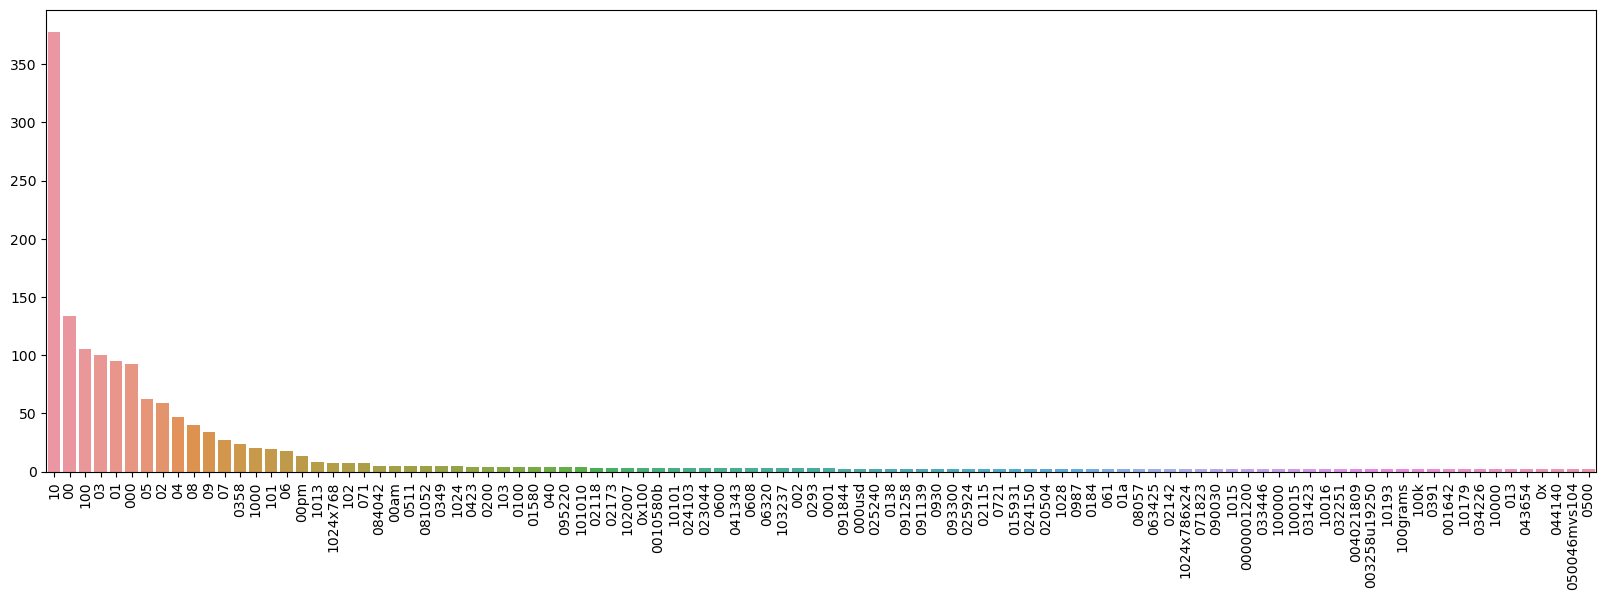

In [15]:
### Exercise 14
top_k = 100 
sorted_indices = np.argsort(term_frequencies[:300])[::-1]
selected_features = [count_vect.get_feature_names_out()[:300][i] for i in sorted_indices]
selected_term_frequencies = [term_frequencies[:300][i] for i in sorted_indices]

selected_features = selected_features[:top_k]
selected_term_frequencies = selected_term_frequencies[:top_k]

plt.figure(figsize=(20, 6))

g = sns.barplot(x=selected_features, y=selected_term_frequencies)
g.set_xticklabels(selected_features, rotation=90)

plt.show()

#取出300筆數據中，前100筆出現頻率較高的數據

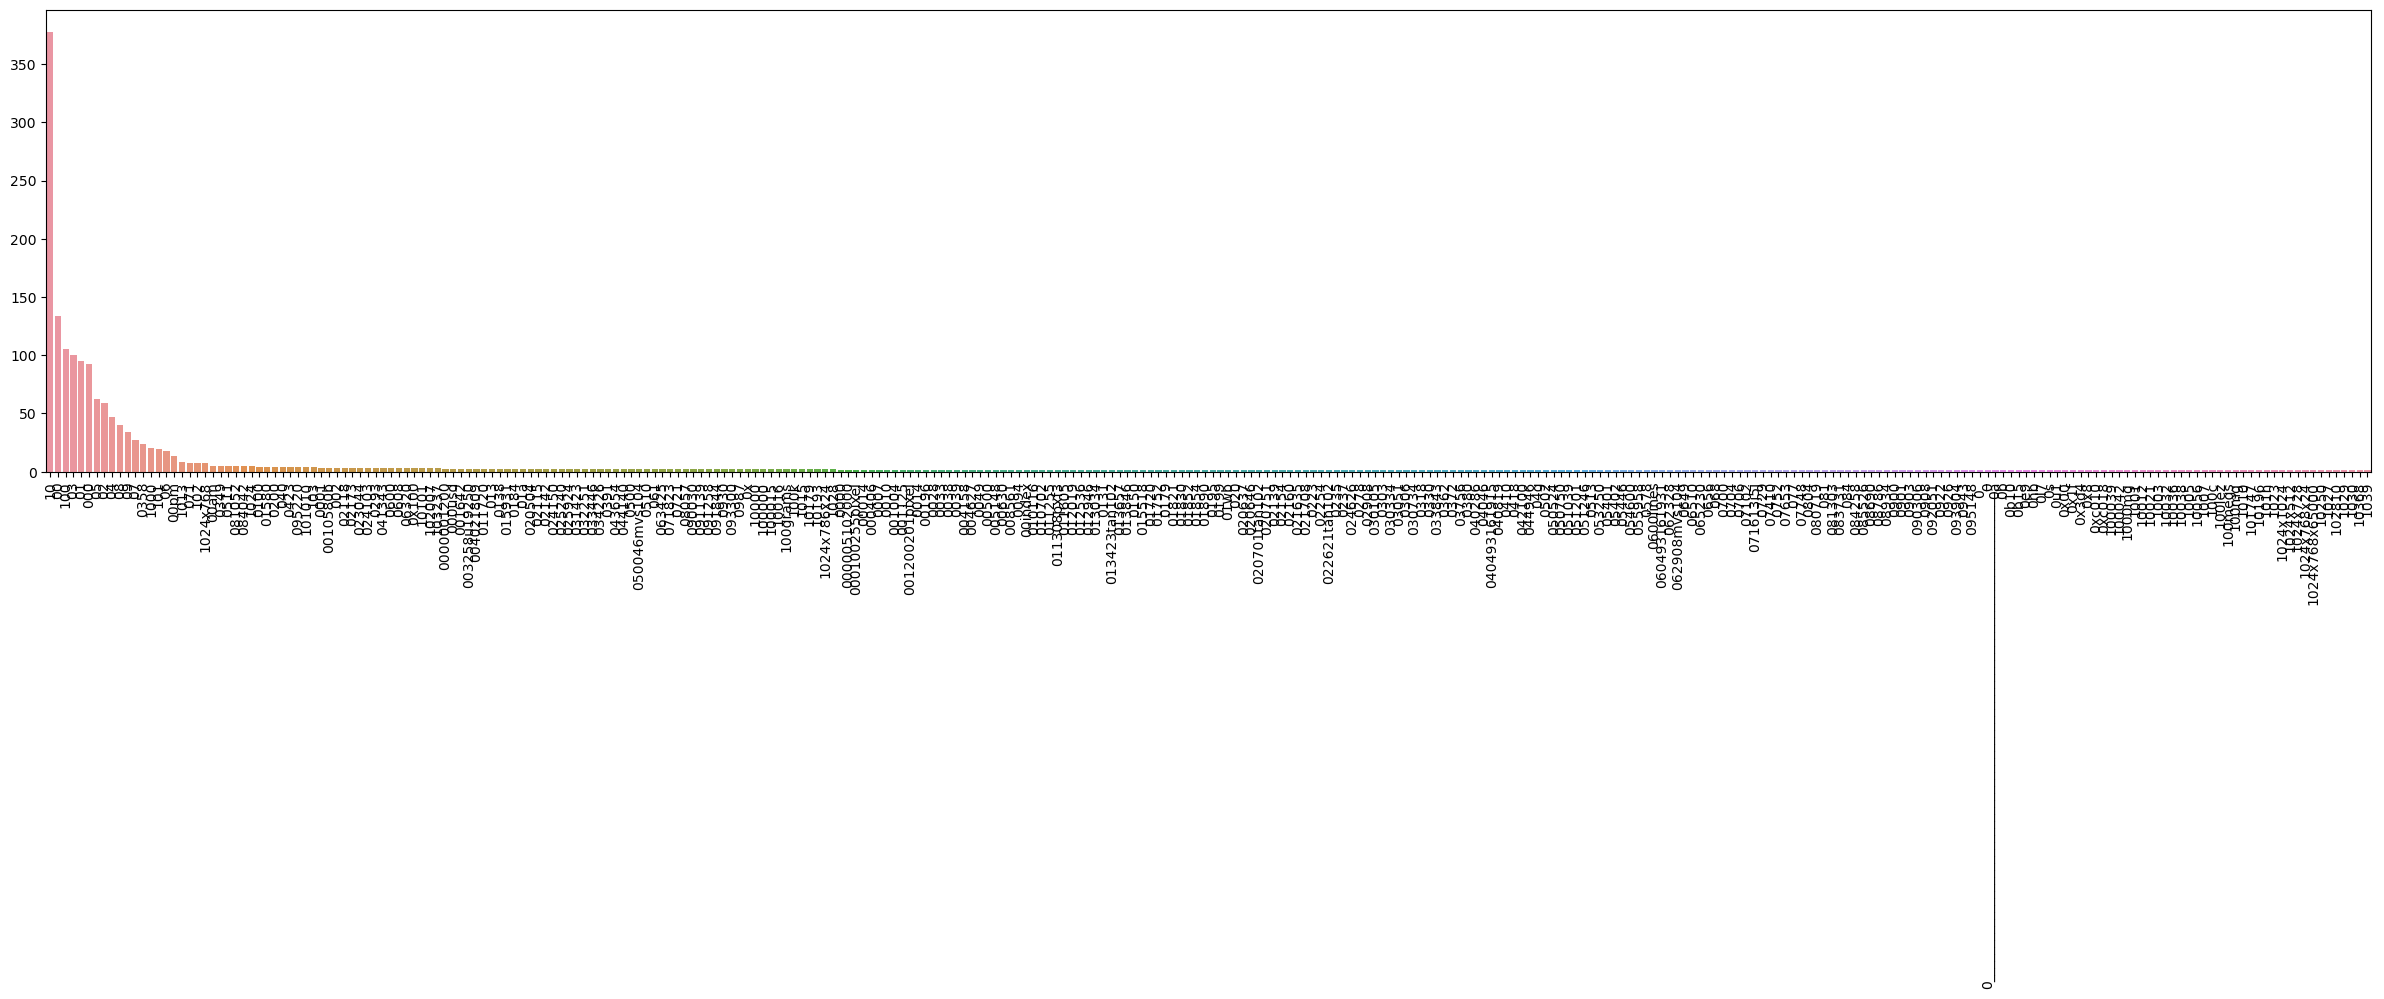

In [16]:
### Exercise 15
selected_features = count_vect.get_feature_names_out()[:300]
selected_term_frequencies = term_frequencies[:300]

sorted_indices = sorted(range(len(selected_term_frequencies)), key=lambda i: selected_term_frequencies[i], reverse=True)
selected_features = [selected_features[i] for i in sorted_indices]
selected_term_frequencies = [selected_term_frequencies[i] for i in sorted_indices]

plt.figure(figsize=(30, 6))

g = sns.barplot(x=selected_features, y=selected_term_frequencies)
g.set_xticklabels(selected_features, rotation=90)

plt.show()

In [17]:
### Exercise 16
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X['category_name'])
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

#LabelBinarizer可以直接把文字轉成獨熱編碼

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name                                           unigrams  \
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...   
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....   
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...   
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...   
4  soc.religion.christian  [From, :, stanly, @, grok11.columbiasc.ncr.com...   
5  soc.religion.christian  [From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...   
6  soc.religion.christian  [From, :, jodfishe, @, silver.ucs.indiana.edu,...   
7                 sci.med  [From, :, aldridge, @, netcom.com, (, Jacqueli...   
8                 sci.med  [From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...   

  bin_category_name  
0      [0, 1, 0, 0]  
1      [0, 1, 0, 0]  
2      [0, 0, 0, 1]  
3      [0, 0, 0, 1]  
4      [0, 0, 0, 1]  
5      [0, 0, 0, 1]  
6      [0, 0, 0, 1]  
7      [0, 0, 1, 0]  
8      [0, 0, 1, 0]


檢查缺失值:


Sentence                               Score  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                                  Doc                            Doc_Name  
0  The amoung of missing records is:   The amoung of missing records is:   
1                                   0                                   0

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jenny\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!



df:


Sentence  Score  Doc  \
0  So there is no way for me to plug it in here i...      0    0   
1                        Good case, Excellent value.      1    0   
2                             Great for the jawbone.      1    0   
3  Tied to charger for conversations lasting more...      0    0   
4                                  The mic is great.      1    0   

                Doc_Name                                           unigrams  
0  amazon_cells_labelled  [So, there, is, no, way, for, me, to, plug, it...  
1  amazon_cells_labelled               [Good, case, ,, Excellent, value, .]  
2  amazon_cells_labelled                      [Great, for, the, jawbone, .]  
3  amazon_cells_labelled  [Tied, to, charger, for, conversations, lastin...  
4  amazon_cells_labelled                           [The, mic, is, great, .]


把字出現在每個句子中的頻率做成表格:


00  10  100  11  12  13  15  15g  15pm  17  ...  yucky  yukon  yum  \
0      0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
1      0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
2      0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
3      0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
4      0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
...   ..  ..  ...  ..  ..  ..  ..  ...   ...  ..  ...    ...    ...  ...   
2995   0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
2996   0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
2997   0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
2998   0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
2999   0   0    0   0   0   0   0    0     0   0  ...      0      0    0   

      yummy  yun  z500a  zero  zillion  zombie  zombiez  
0         0    0      0     0        0       0        0  
1         0    0      0     0        0       0        0  
2         0    0      0     0        0       0        0  
3         0    0      0     0        0       0        0  
4         0    0      0     0        0       0        0  
...     ...  ...    ...   ...      ...     ...      ...  
2995      0    0      0     0        0       0        0  
2996      0    0      0     0        0       0        0  
2997      0    0      0     0        0       0        0  
2998      0    0      0     0        0       0        0  
2999      0    0      0     0        0       0        0  

[3000 rows x 5155 columns]


heatmap:


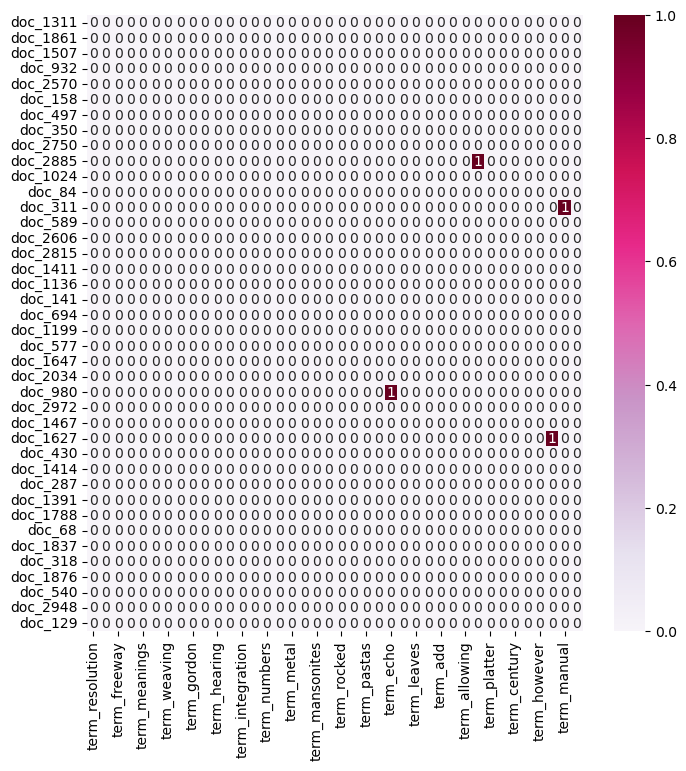

In [18]:
#第二部分
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import random

# 定義讀取文檔的函數
def read_file(name, doc_number):
    with open(name, 'r', encoding='utf-8') as file:
        doc = file.read()
        doc = doc.split('\n')
        doc_name = name.split('.')[0]
        data = []
        for line in doc:
            parts = line.split('\t')
            if len(parts) == 2:
                sentence, score = parts
                data.append((sentence, int(score), doc_number, doc_name))
        return data

# 讀取三個文檔，每個文檔包含句子、分數、文檔代號和文檔名稱
doc1_data = read_file('amazon_cells_labelled.txt', 0)
doc2_data = read_file('imdb_labelled.txt', 1)
doc3_data = read_file('yelp_labelled.txt', 2)

# 將數據轉換為DataFrame
df1 = pd.DataFrame(doc1_data, columns=["Sentence", "Score", "Doc", "Doc_Name"])
df2 = pd.DataFrame(doc2_data, columns=["Sentence", "Score", "Doc", "Doc_Name"])
df3 = pd.DataFrame(doc3_data, columns=["Sentence", "Score", "Doc", "Doc_Name"])

# 合併三個DataFrame成一個
df = pd.concat([df1, df2, df3], ignore_index=True)

#檢查缺失值-->結論是沒有
print("\n檢查缺失值:")
display(df.isnull().apply(lambda x: dmh.check_missing_values(x)))

nltk.download('punkt')

# 對句子進行斷詞
df['unigrams'] = df['Sentence'].apply(lambda x: nltk.word_tokenize(x))
print("\ndf:")
display(df[0:5])

# 使用CountVectorizer計算字出現的頻率
print("\n把字出現在每個句子中的頻率做成表格:")
count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df['Sentence'])
plot_x = count_vect.get_feature_names_out()
plot_y = df.index
plot_z = df_counts.toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)

#隨機選取40筆資料和40個字，並畫出他們的 heatmap
print("\nheatmap:")
sampled_indices_x = random.sample(range(len(plot_x)), 40)
sampled_indices_y = random.sample(range(len(plot_y)), 40)
sampled_plot_x = ["term_" + plot_x[i] for i in sampled_indices_x]
sampled_plot_y = ["doc_" + str(i) for i in sampled_indices_y]
sampled_plot_z = [plot_z[i] for i in sampled_indices_y]
sampled_plot_z = [row[sampled_indices_x] for row in sampled_plot_z]
sampled_df = pd.DataFrame(sampled_plot_z, columns=sampled_plot_x, index=sampled_plot_y)

plt.subplots(figsize=(8, 8))
ax = sns.heatmap(sampled_df, cmap="PuRd", vmin=0, vmax=1, annot=True)


PCA降到2維:


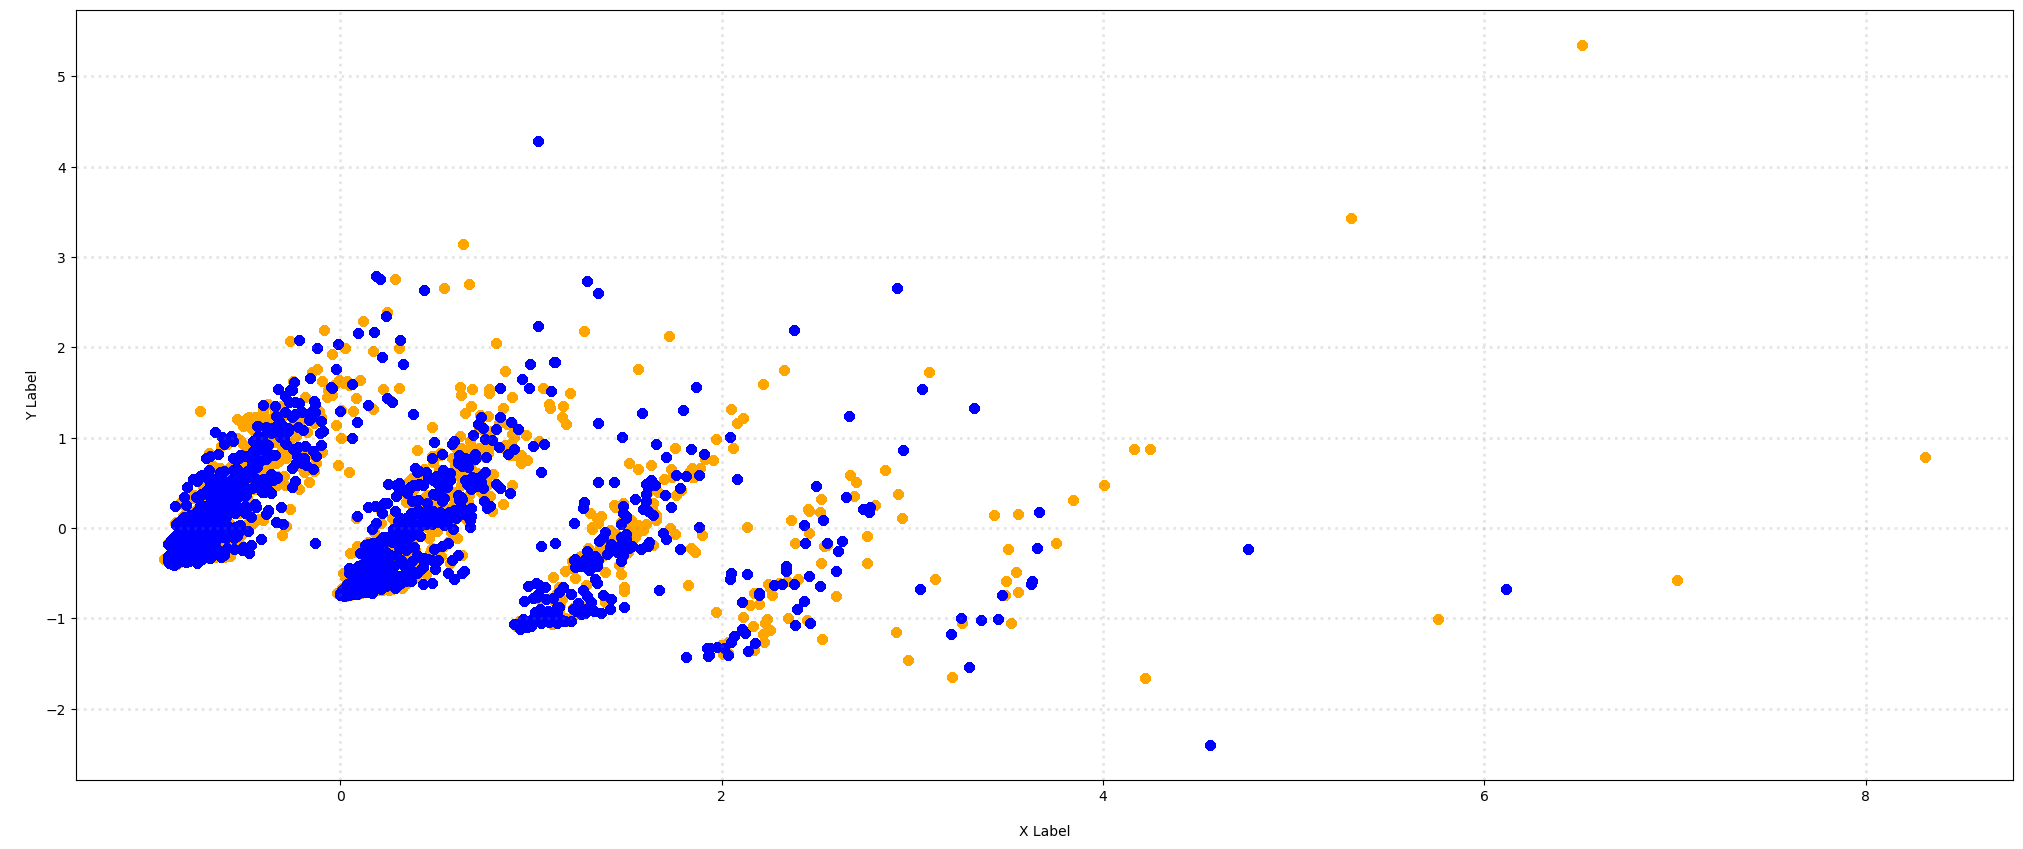

In [19]:
# PCA降維至2維

print("\nPCA降到2維:")
plot_z_2d = PCA(n_components=2).fit_transform(df_counts.toarray())
Score = ['0', '1']
colors = {'0': 'blue', '1': 'orange'}

fig = plt.figure(figsize=(25, 10))
ax = fig.subplots()

for score in df['Score']:
    xs = plot_z_2d[df['Score'] == score][:, 0]
    ys = plot_z_2d[df['Score'] == score][:, 1]
    ax.scatter(xs, ys, c=colors[str(score)], label=score, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()


PCA降到3維:


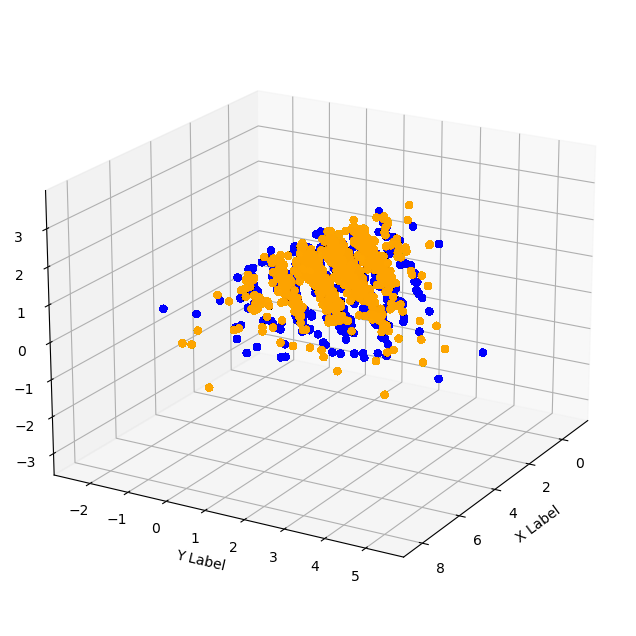

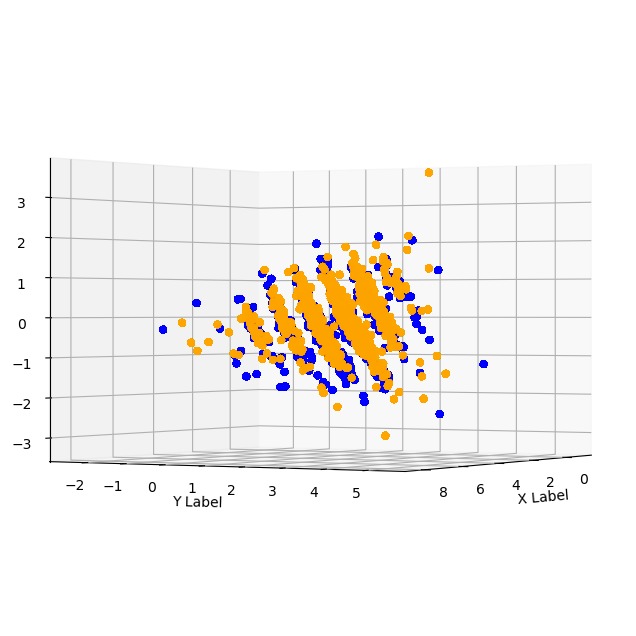

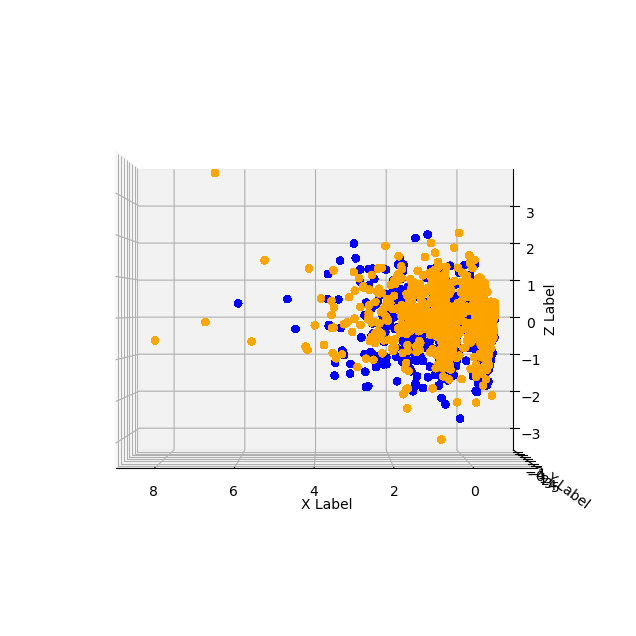

In [20]:
def plot_3d_with_view(X_reduced, Score, elev, azim):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    colors = {'0': 'blue', '1': 'orange'}

    for score in Score:
        xs = X_reduced[df['Score'] == score].T[0]
        ys = X_reduced[df['Score'] == score].T[1]
        zs = X_reduced[df['Score'] == score].T[2]

        ax.scatter(xs, ys, zs, c=colors[str(score)], label=score, marker='o')

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    ax.view_init(elev=elev, azim=azim)
    plt.show()

print("\nPCA降到3維:")
plot_z_3d = PCA(n_components=3).fit_transform(df_counts.toarray())
plot_3d_with_view(plot_z_3d, df['Score'], elev=20, azim=30)
plot_3d_with_view(plot_z_3d, df['Score'], elev=0, azim=30)
plot_3d_with_view(plot_z_3d, df['Score'], elev=0, azim=90)

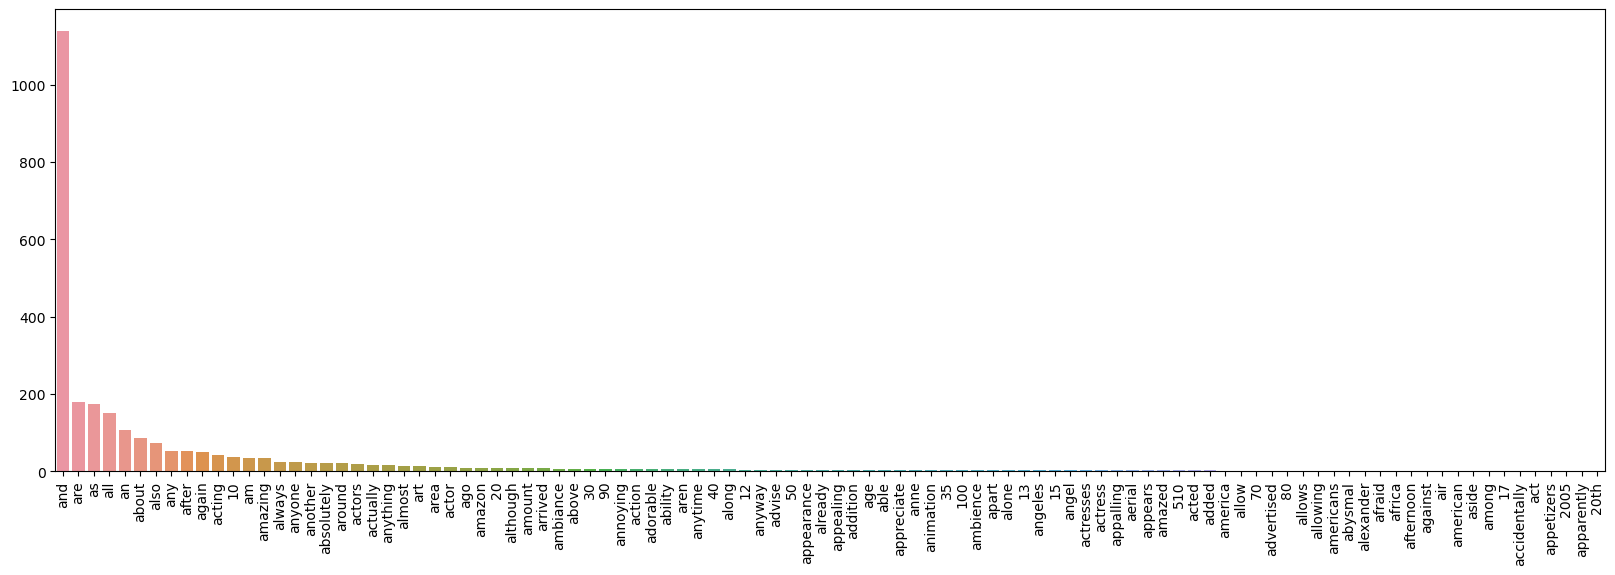

In [21]:
# 畫出現頻率的圖
import plotly.express as px
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]
fig = px.bar(x=plot_x[:300], y=term_frequencies[:300])
fig.update_xaxes(tickangle=90)
fig.update_layout(
    title='Term Frequencies',
    xaxis_title='Terms',
    yaxis_title='Frequency'
)

fig.show()

#取出300筆數據中，比較多的前100筆 用long tail表示
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]
term_indices = np.argsort(term_frequencies[:300])[::-1]
top_k = 100
selected_features = [plot_x[i] for i in term_indices[:top_k]]
selected_term_frequencies = term_frequencies[term_indices[:top_k]]


plt.figure(figsize=(20, 6))

g = sns.barplot(x=selected_features, y=selected_term_frequencies)
g.set_xticklabels(selected_features, rotation=90)

plt.show()

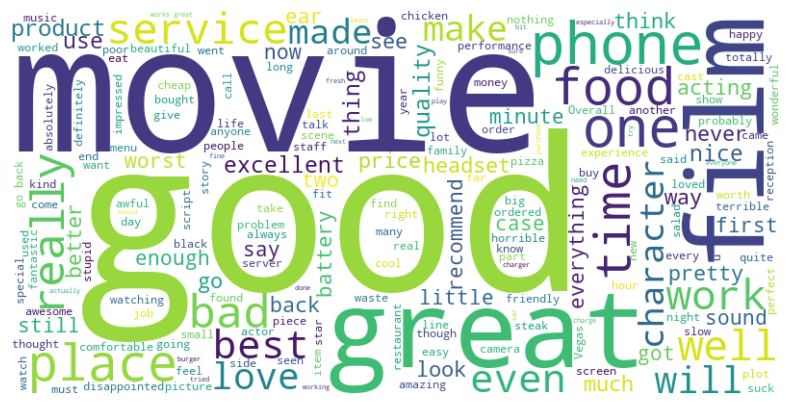

In [22]:
#Third Part1

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Sentence'])) #建立詞雲
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

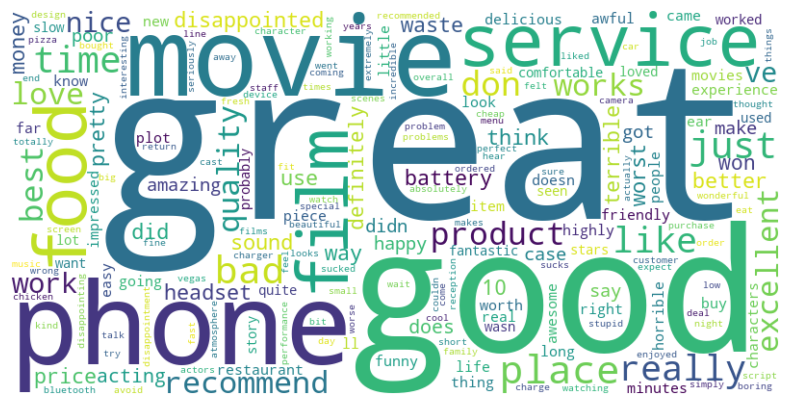

In [23]:
#Third Part2

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')  # 用Scikit-learn的內置英文停用詞列表，減少and、the這些詞的影響
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Sentence'])
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.sum(axis=0).A1
tfidf_word_scores = {feature_names[i]: tfidf_scores[i] for i in range(len(feature_names))}
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tfidf_word_scores)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [24]:
#Third Part3

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

#TF-IDF features 
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(df['Sentence'])
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, df['Score'], test_size=0.2, random_state=42) #分割資料集

nb_tfidf = MultinomialNB() #初始化
nb_tfidf.fit(X_train_tfidf, y_train) #訓練模型
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf) #預測
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
report_tfidf = classification_report(y_test, y_pred_tfidf)

#word frequency features
count_vectorizer = CountVectorizer()
X_count = count_vectorizer.fit_transform(df['Sentence'])
X_train_count, X_test_count, _, _ = train_test_split(X_count, df['Score'], test_size=0.2, random_state=42)

nb_count = MultinomialNB()
nb_count.fit(X_train_count, y_train)
y_pred_count = nb_count.predict(X_test_count)
accuracy_count = accuracy_score(y_test, y_pred_count)
report_count = classification_report(y_test, y_pred_count)

# 結果
print("Performance using TF-IDF Features:")
print(f"Accuracy: {accuracy_tfidf}")
print(report_tfidf)

print("\nPerformance using Word Frequency (Count) Features:")
print(f"Accuracy: {accuracy_count}")
print(report_count)

#TF-IDF的優點：會考慮單詞的重要性，比較能捕捉到文本中的關鍵詞
#TF-IDF的缺點：較多的計算量，訓練時間可能較長，對於小型數據集或有大量特徵的數據，可能會遇到過擬合問題

#word frequency 的優點:計算簡單，速度較快，適合用於小型數據集
#word frequency 的缺點:不考慮單詞的重要性，容易受到停用詞的影響


Performance using TF-IDF Features:
Accuracy: 0.825
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       299
           1       0.82      0.84      0.83       301

    accuracy                           0.82       600
   macro avg       0.83      0.82      0.82       600
weighted avg       0.83      0.82      0.82       600


Performance using Word Frequency (Count) Features:
Accuracy: 0.8333333333333334
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       299
           1       0.85      0.81      0.83       301

    accuracy                           0.83       600
   macro avg       0.83      0.83      0.83       600
weighted avg       0.83      0.83      0.83       600



In [18]:
#Fourth 
#增加 移除停用詞、去除標點符號和特殊字符、文本小寫化、詞形還原、拼字檢查和修復

from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import random
from spellchecker import SpellChecker 

# 定義讀取文檔的函數
def read_file(name, doc_number):
    with open(name, 'r', encoding='utf-8') as file:
        doc = file.read()
        doc = doc.split('\n')
        doc_name = name.split('.')[0]
        data = []
        for line in doc:
            parts = line.split('\t')
            if len(parts) == 2:
                sentence, score = parts
                data.append((sentence, int(score), doc_number, doc_name))
        return data

# 讀取三個文檔，每個文檔包含句子、分數、文檔代號和文檔名稱
doc1_data = read_file('amazon_cells_labelled.txt', 0)
doc2_data = read_file('imdb_labelled.txt', 1)
doc3_data = read_file('yelp_labelled.txt', 2)

# 將數據轉換為DataFrame
df1 = pd.DataFrame(doc1_data, columns=["Sentence", "Score", "Doc", "Doc_Name"])
df2 = pd.DataFrame(doc2_data, columns=["Sentence", "Score", "Doc", "Doc_Name"])
df3 = pd.DataFrame(doc3_data, columns=["Sentence", "Score", "Doc", "Doc_Name"])

# 合併三個DataFrame成一個
df = pd.concat([df1, df2, df3], ignore_index=True)


#檢查缺失值-->結論是沒有
print("\n檢查缺失值:")
display(df.isnull().apply(lambda x: dmh.check_missing_values(x)))

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# 對句子進行斷詞
df['unigrams'] = df['Sentence'].apply(lambda x: nltk.word_tokenize(x))
print("\ndf:")
display(df[0:5])

# 移除停用詞、去除標點符號和特殊字符、文本小寫化、詞形還原、拼字檢查和修復
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
spell = SpellChecker()

def preprocess_text(text):
    text = ' '.join(word for word in text if word.isalnum()) #移除去除標點符號和特殊字符 
    text = ' '.join(word for word in text.split() if word.lower() not in stop_words)  #移除停用詞
    text = text.lower()  #文本小寫化
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split())  #詞形還原
    text = ' '.join(spell.correction(word) if spell.correction(word) is not None else word for word in text.split()) #拼字檢查和修復

    return text


df['unigrams'] = df['unigrams'].apply(preprocess_text)


# 使用CountVectorizer計算字出現的頻率
print("\n把詞的出現的頻率做成表格:")
count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df['unigrams'])  
plot_x = count_vect.get_feature_names_out()
plot_y = df.index
plot_z = df_counts.toarray()
df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)
display(df_todraw)


檢查缺失值:


Sentence                               Score  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                                  Doc                            Doc_Name  
0  The amoung of missing records is:   The amoung of missing records is:   
1                                   0                                   0

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jenny\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jenny\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jenny\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



df:


Sentence  Score  Doc  \
0  So there is no way for me to plug it in here i...      0    0   
1                        Good case, Excellent value.      1    0   
2                             Great for the jawbone.      1    0   
3  Tied to charger for conversations lasting more...      0    0   
4                                  The mic is great.      1    0   

                Doc_Name                                           unigrams  
0  amazon_cells_labelled  [So, there, is, no, way, for, me, to, plug, it...  
1  amazon_cells_labelled               [Good, case, ,, Excellent, value, .]  
2  amazon_cells_labelled                      [Great, for, the, jawbone, .]  
3  amazon_cells_labelled  [Tied, to, charger, for, conversations, lastin...  
4  amazon_cells_labelled                           [The, mic, is, great, .]


把词出现在每个句子中的频率做成表格:


10  100  11  12  13  15  17  18  1928  1947  ...  youtube  yucky  yukon  \
0      0    0   0   0   0   0   0   0     0     0  ...        0      0      0   
1      0    0   0   0   0   0   0   0     0     0  ...        0      0      0   
2      0    0   0   0   0   0   0   0     0     0  ...        0      0      0   
3      0    0   0   0   0   0   0   0     0     0  ...        0      0      0   
4      0    0   0   0   0   0   0   0     0     0  ...        0      0      0   
...   ..  ...  ..  ..  ..  ..  ..  ..   ...   ...  ...      ...    ...    ...   
2995   0    0   0   0   0   0   0   0     0     0  ...        0      0      0   
2996   0    0   0   0   0   0   0   0     0     0  ...        0      0      0   
2997   0    0   0   0   0   0   0   0     0     0  ...        0      0      0   
2998   0    0   0   0   0   0   0   0     0     0  ...        0      0      0   
2999   0    0   0   0   0   0   0   0     0     0  ...        0      0      0   

      yum  yummy  yun  z500a  zero  zillion  zombie  
0       0      0    0      0     0        0       0  
1       0      0    0      0     0        0       0  
2       0      0    0      0     0        0       0  
3       0      0    0      0     0        0       0  
4       0      0    0      0     0        0       0  
...   ...    ...  ...    ...   ...      ...     ...  
2995    0      0    0      0     0        0       0  
2996    0      0    0      0     0        0       0  
2997    0      0    0      0     0        0       0  
2998    0      0    0      0     0        0       0  
2999    0      0    0      0     0        0       0  

[3000 rows x 4403 columns]

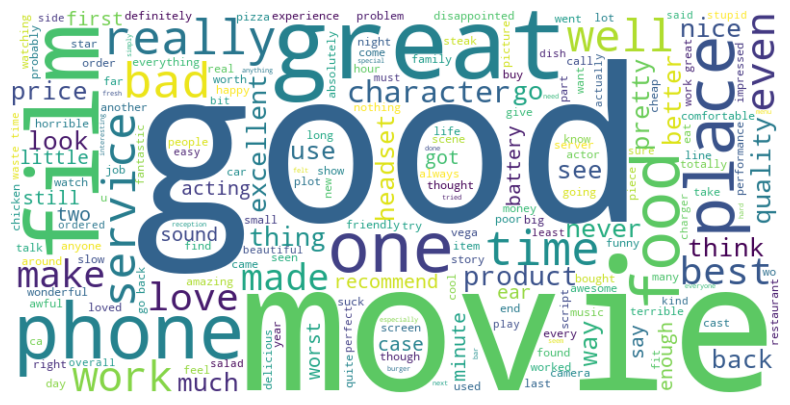

In [21]:
from wordcloud import WordCloud
processed_text = ' '.join(df['unigrams'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(processed_text)#建立詞雲
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()